<center>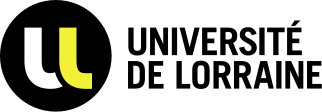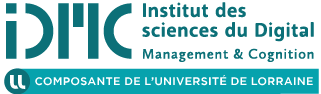</center>

<h1><center><strong><font color="Teal">Data Mining for Natural Language Processing<br/> Master 2 Natural Language Processing <br/> Lab 1</font></strong></center></h1>


<center>
<h3><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@univ-lorraine.fr</email>
<br/>
Year 2023-2024
</center>

<center><h3><center><font color="green"><strong>Student Version</strong></font></center></h3>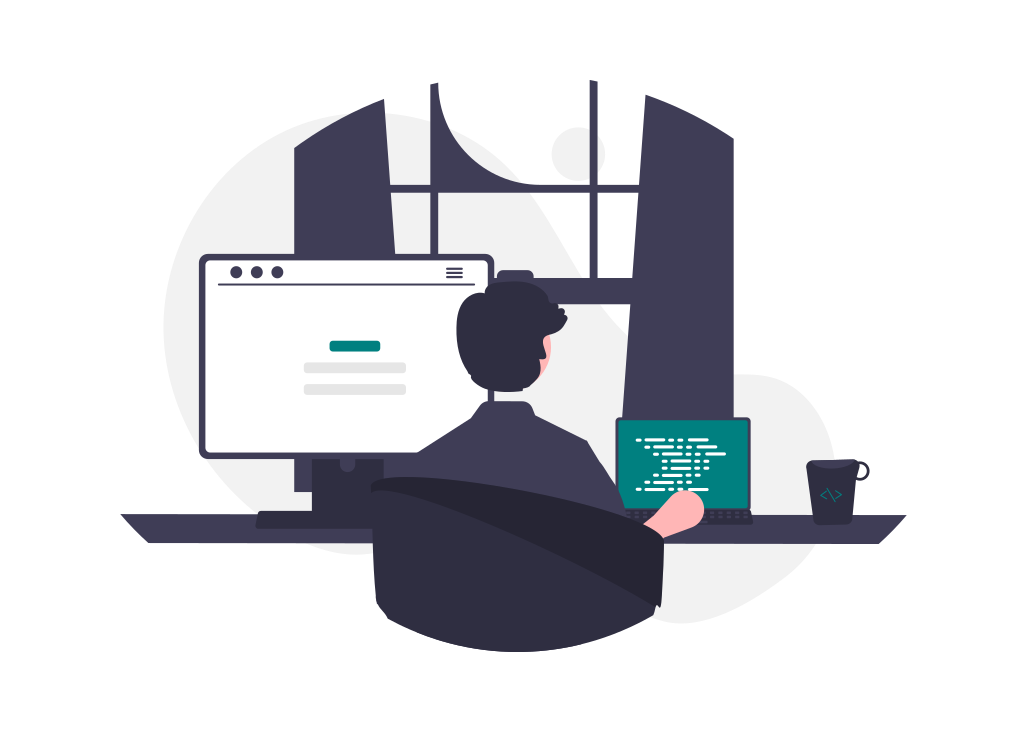</center>

# <font color="teal">**An introduction to textual data**</font>



## <font color="teal">**Lecture takeaways**</font>

- The Why of NLP
- What is NLP ? the four challenges of NLP

- NLP in three pipelines

## <font color="teal">**Lab session Prerequisites**</font>

- Python
- Pandas

For those not familiar with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

## <font color="teal">**Lab session in a nutshell**</font>

- Grasping a dataset
- Basic Tokenization (Word Segmentation) of a dataset
(Compute Vocabulary and Zipf's law)
- Introdution to Regex
- Hands on some processing tools (POS, NER, ...)

## <font color="teal">**Resources :**</font>

- NLTK : https://www.nltk.org/api/nltk.tokenize.html
- PANDAS : https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- SPACY : https://spacy.io/usage/spacy-101


## <font color="teal">**Database**</font>

We will use the PLOS narrativity database

This database is used in a scientific article about the **importance of narrativity** in the citation frequency of climate change scientific articles.  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0167983  


## <font color="teal">**Tasks**</font>

### 1. Basic preprocessing
#### 1.1 Open the database. Generate simple statistics about the abstracts. How many unique articles are there? What is the mean length of abstracts in characters?
#### 1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent?

### 2. Word-level preprocessing
#### 2.1 Split the abstracts into list of words. How many different words are there in the vocabulary?
#### 2.2 Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?
#### 2.3 Check if Zipf's law applies.

### 3. Domain specificity and regex
#### 3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) using a regex.
#### 3.2 How many percent of characters are numbers (as defined above) in a given abstract?
#### 3.3 Is there any relationship between the percentage of numbers in an abstract and the amount of citation?  

### 4. Classic NLP Pipeline to Represent Data
#### 4.0 Re-tokenize using spacy
#### 4.1 Lemmatize using spacy
#### 4.2 POS tagging using spacy, plot the trees
#### 4.3 NER using spacy, give the amount of each entity type for a given abstract, and compare it to the amount of citations.

### 5. Topic Modelling
#### 5.1 Use Gensim's LDA to compute a topic model.
#### 5.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?
#### 5.3 Use a tf-idf representation for each abstract, and use your favorite clustering algorithm.

## <font color="teal">"Quality of Life" Tips</font>

- To better understand when you need to do something, please for the 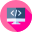 **TODO!** marks sprinkled across the lab!

- Run the small pieces of code (named Code Cells) below to see what they do (in Jupyter Notebook or Google Colab, press the small \"play\" button on the left, or press ctrl+enter in the code box)
- On Google Colab and VSCode, you can fold and unfold section and subsections to better display the notebook. Try to click on the arrow of this '"Quality of Life" Tips' section as below:
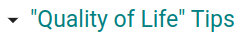

# <font color="teal">**1. Basic preprocessing**</font>





In [ ]:
# Downloading the database using the following linux commands or
# from https://www.kaggle.com/crowdflower/narrativity-in-scientific-publishing and unzip
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/PLOS_narrativity.zip
! unzip PLOS_narrativity.zip
! rm PLOS_narrativity.zip


## <font color="teal">**1.1 Open the database. Generate simple statistics about the abstracts. How many unique articles are there? What is the mean length of abstracts in characters?**</font>

In [ ]:
%matplotlib inline
# import pandas to handle dataframe tables and its related operations
import pandas as pd
# import matplotlib to display charts
import matplotlib.pyplot as plt

In [ ]:
# Read the Colon Separated Values file and parse it into a Pandas Dataframe named df
df = pd.read_csv('PLOS_narrativity.csv', index_col=0)
# Print the shape of the Dataframe, meaning its size and depth (5614 rows and 47 cols)
print("Shape:  {0}".format(df.shape))

Shape:  (5614, 47)


In [ ]:
# length of the unique values of the column 'ab' from dataframe df
len(df['ab'].unique())

802

In [ ]:
# e.g
# Number of different articles in the database
df.groupby("X_unit_id").count()

,X_created_at,X_id,X_started_at,X_tainted,X_channel,X_trust,X_worker_id,X_country,X_region,X_city,...,sn,ti,ut,vl,z9,cin_mas,firstauthor,numberauthors,pid_mas,title
X_unit_id,,,,,,,,,,,,,,,,,,,,,
886110198,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,7,7,7,7,7
886110199,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,7,7,7,7,7
886110200,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,7,7,7,7,7
886110201,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,7,7,7,7,7
886110202,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908379225,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,0,0,0,0
908379226,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,0,0,0,0
908379237,7,7,7,7,7,7,7,7,6,6,...,7,7,7,7,7,0,0,0,0,0


In [ ]:
# Mean length of abstracts in characters
sum_length = 0
for i in df['ab']:
  length = len(i)
  sum_length += length
avg = sum_length/5614

In [ ]:
print(avg)

1496.1795511221944


#### 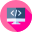 **TODO!**

In [ ]:
# Distribution of the abstracts length in character
%matplotlib inline

## <font color="teal">**1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent?**</font>


#### 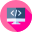 **TODO!**

In [ ]:
# First, number of annotator per article ('pmid' variable)
# --> X annotators/article
# tips: you can use drop_duplicate and hist() methods from Pandas (or iterate through the pmid variable)
df.columns

Index(['X_unit_id', 'X_created_at', 'X_id', 'X_started_at', 'X_tainted',
       'X_channel', 'X_trust', 'X_worker_id', 'X_country', 'X_region',
       'X_city', 'X_ip', 'appeal_to_reader', 'conjunctions', 'connectivity',
       'narrative_perspective', 'sensory_language', 'setting', 'ab',
       'appeal_to_reader_gold', 'conjunctions_gold', 'connectivity_gold',
       'narrative_perspective_gold', 'pmid', 'py', 'sensory_language_gold',
       'setting_gold', 'so', 'tc', 'af', 'au', 'bp', 'di', 'ep', 'is', 'pd',
       'pt', 'sn', 'ti', 'ut', 'vl', 'z9', 'cin_mas', 'firstauthor',
       'numberauthors', 'pid_mas', 'title'],
      dtype='object')

#### 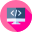 **TODO!**

In [ ]:
# Seing coherence between annotators : need to transform appeal_to_reader, narrative_perspective, setting to bools.
# Then, std on the columns.
df['appeal_to_reader'] = df.appeal_to_reader.apply(lambda x: True if x=="yes" else False)
df['narrative_perspective'] = df.narrative_perspective.apply(lambda x: True if x=="yes" else False)
df['setting'] = df.setting.apply(lambda x: True if x=="yes" else False)

In [ ]:
eval_cols = ["appeal_to_reader", "conjunctions", "connectivity", "narrative_perspective", "sensory_language", "setting"]
df.groupby(df.pmid)[eval_cols].std()

,appeal_to_reader,conjunctions,connectivity,narrative_perspective,sensory_language,setting
pmid,,,,,,
18726051,0.487950,1.976047,1.000000,0.487950,1.397276,0.000000
18783869,0.534522,1.573592,1.976047,0.377964,1.718249,0.534522
18810525,0.487950,1.345185,1.799471,0.487950,1.463850,0.000000
18810526,0.487950,2.214670,0.975900,0.377964,1.214986,0.000000
18811616,0.534522,1.069045,1.380131,0.377964,1.069045,0.487950
...,...,...,...,...,...,...
22216227,0.487950,1.133893,1.718249,0.534522,2.449490,0.377964
22216263,0.487950,0.951190,2.340126,0.487950,0.975900,0.487950
22216307,0.534522,1.133893,1.799471,0.487950,1.380131,0.377964


In [ ]:
len(df.pmid.unique())

802

# <font color="teal">**2. Word-level preprocessing**</font>


## <font color="teal">**2.1 Split the abstracts into list of words. How many different words are there in the vocabulary?**</font>



#### 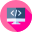 **TODO!**

How many different words are there in the vocabulary?

In [ ]:
from functools import reduce
from operator import add

# List of words with separator = " "
arr = df.ab.drop_duplicates().apply(lambda x: x.split(' ')).array

arr = reduce(add, arr)
#len(set(arr))

## <font color="teal">**2.2 Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?**</font>



#### 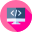 **TODO!**

In [ ]:
# https://www.nltk.org/api/nltk.tokenize.html
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
# e.g : tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]

## <font color="teal">**2.3 Check if Zipf's law applies.**</font>
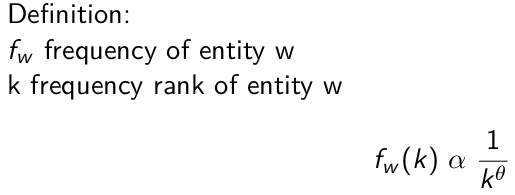

#### 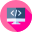 **TODO!**

In [ ]:
# This import allows you to count the occurrences of each different elements in a list
from collections import Counter
# example usage: a = [1, 1, 2, 5, 6, 5]; print(Counter(a))

# <font color="teal">**3. Domain specificity and regex**</font>


## <font color="teal">**3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) in abstracts.**</font>


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* :

- A good website to write and test regular expressions :
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf


#### 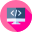 **TODO!**

In [ ]:
import re
# Regular expression that matches any sequence of numbers:
nb =  '[0-9]+' # retrieve all numbers : ([0-9] == from 0 to 9, and + allows multiple matches)

## <font color="teal">**3.2 How many percent of characters are numbers (as defined above) in a given abstract?**</font>


#### 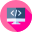 **TODO!**

## <font color="teal">**3.3 Is there any relationship between the percentage of numbers in an abstract and the amount of citation?**</font>

#### 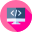 **TODO!**


# <font color="teal">**4. Classic NLP pipeline**</font>


### <font color="teal">**4.0 Re-tokenize using spacy**</font>

It is useful to take a look at spacy's [tokenizer documentation](https://spacy.io/usage/spacy-101#annotations-token)

#### 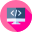 **TODO!**

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Repeating the earlier vocabulary count

# Inspecting a tokenization sample


## <font color="teal">**4.1 Lemmatize using spacy**</font>

#### 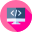 **TODO!**

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lookups import Lookups
from spacy.lang.en import English

# Counting lemmas vocabulary count (lemmatizer is in the spacy pipeline)
# use nlp() then each element has a .lemma_ attribute


## <font color="teal">**4.2 POS tagging using spacy, plot the trees**</font>

#### 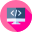 **TODO!**

In [ ]:
from spacy import displacy


## <font color="teal">**4.3 NER using spacy, give the amount of each entity type for a given abstract, and compare it to the amount of citations.**</font>

In [ ]:
# Visualizing Entities
for ab in df.ab.drop_duplicates().head()[:2]:
  doc = nlp(ab)
  displacy.render(doc, style="ent",jupyter=True)

#### 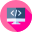 **TODO!**

In [ ]:
# Getting the entity Information (takes about 40s)

# Displaying the available entity types

Spacy recognizes 18 entity types. These types are the following:
{'LAW', 'NORP', 'ORDINAL', 'LOC', 'TIME', 'EVENT', 'LANGUAGE', 'CARDINAL', 'WORK_OF_ART', 'PRODUCT', 'PERCENT', 'DATE', 'GPE', 'MONEY', 'PERSON', 'ORG', 'QUANTITY', 'FAC'}


#### 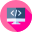 **TODO!**

In [ ]:
# Get counts for Every entity type

#### 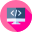 **TODO!**

In [ ]:
# Displaying correlations for every entity type's presence with log(tc)

Regarding CARDINAL, the correlation could not be rejected :
 spearmanr: (-0.1857760776916116, 1.1637837577962128e-07), pearsonr: (-0.13621815478310795, 0.0001089790717316319)
Regarding GPE, the correlation could not be rejected :
 spearmanr: (-0.23700487353088792, 1.057074194306966e-11), pearsonr: (-0.1558344169608617, 9.275970994185234e-06)
Regarding PERSON, the correlation could not be rejected :
 spearmanr: (-0.16136566818523898, 4.3730537725663865e-06), pearsonr: (-0.16124840625300163, 4.444500635012091e-06)
Regarding ORG, the correlation could not be rejected :
 spearmanr: (-0.19201245528955035, 4.2458596382389345e-08), pearsonr: (-0.12401802948281859, 0.00043112063221038604)



# <font color="teal">**5. Topic Modelling**</font>


## <font color="teal">**5.1 Use Gensim's LDA to compute a topic model.**</font>


#### 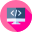 **TODO!**

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
# continue here

## <font color="teal">**5.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?**</font>


In [ ]:
! pip install pyLDAvis


In [ ]:
import pyLDAvis.gensim_models
# the ldamodel, corpus and dictionary should come from the 5.1 exercise!
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Topic modelling not very relevant here.